Imported necessary Libraries

In [454]:


import keras
from keras.datasets import fashion_mnist
from random import randrange
import numpy as np
import random
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras import backend as K
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Defined the Classes

In [455]:
classes = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
           5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

This is a simple exploration of the DF for how it is currently shaped.

In [456]:
print('Rows: %d, columns: %d' % (x_train.shape[0], x_train.shape[1]))

Rows: 60000, columns: 28


Quick view of images in the Data Frame

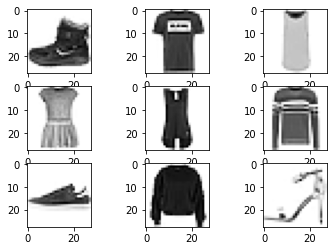

In [457]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('Greys'))

Subset of dataframe for items that are labeled as dresses

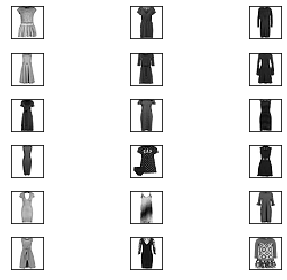

In [458]:
fig, ax = plt.subplots(nrows=6, ncols=3, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(18):
    img = x_train[y_train == 3][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Function to generate a random image and it's corresponding label in the dataframe

In [459]:
def plot_image(X, y=None):
    if y is None:
        y = 'unknown'
    else:
        y = classes[y]
    plt.title('Label is {label}'.format(label=y))
    plt.imshow(X, cmap='gray')
    plt.show()

def ran_imagetest():
    x=randrange(0,1000)   
    plot_image(x_train[x], y_train[x])


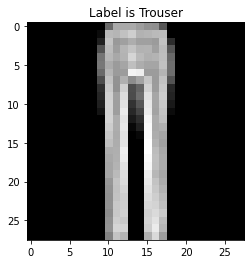

In [362]:
ran_imagetest()

Reshaping the data to allow for various models

In [460]:
x_train_prep = x_train / 255
x_test_prep = x_test / 255

x_train_prep_1d = x_train_prep.reshape(-1, 28 * 28)
x_test_prep_1d = x_test_prep.reshape(-1, 28 * 28)

Some basic functions for running models and producing resulting information from the models. Pulled from https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/

In [461]:
import heapq

def find_example(model, x, y, true_class, predicted_class):
    y_true = y
    y_pred = model.predict(x)
    found_index = None
    for index, (current_y_true, current_y_pred) in enumerate(zip(y_true, y_pred)):
        if current_y_true == true_class and current_y_pred == predicted_class:
            found_index = index
            break
    return found_index

def plot_example(model, x, y, true_class, predicted_class, n, value=None):
    index = find_example(model, x, y, true_class, predicted_class)
    print('True class:', classes[true_class])
    print('Predicted class:', classes[predicted_class])
    if value is not None:
        print('Misclassified', value, 'times')
    if index is not None:
        plt.imshow(n[index], cmap='Greys')
        plt.show()
    print('')
    
def analyze_model(model, x, y, n, inspect_n=5):
    y_pred = model.predict(x)
    conf_matrix = confusion_matrix(y, y_pred)
    print('Confusion matrix:')
    print(conf_matrix)
    print('')
    for _ in range(10):
        conf_matrix[_][_] = 0
    conf_matrix_flat = conf_matrix.reshape(-1, 1)
    biggest_indices = heapq.nlargest(inspect_n, range(len(conf_matrix_flat)), conf_matrix_flat.take)
    biggest_indices = np.unravel_index(biggest_indices, conf_matrix.shape)
    highest_values = conf_matrix[biggest_indices]
    for x_index, y_index, value in zip(biggest_indices[0], biggest_indices[1], highest_values):
        plot_example(model, x, y, x_index, y_index, n, value)

Naive Bayes Model

In [462]:
naive_bayes = GaussianNB()
print(np.mean(cross_val_score(estimator=naive_bayes, cv=4, scoring='accuracy', X=x_train_prep_1d, y=y_train)))
naive_bayes.fit(x_train_prep_1d, y_train)

0.5900666666666666


GaussianNB(priors=None, var_smoothing=1e-09)

Model Analysis

Confusion matrix:
[[3674  359  170 1081  471    1   99    0  145    0]
 [   6 5693   64  178   11    0   42    0    6    0]
 [  18  100 1948  382 3278    0  148    0  126    0]
 [  43 2294   29 3393  192    0   35    0   14    0]
 [   3  248  250  900 4525    1   21    0   52    0]
 [   1    3    3    9    1 1551   28 4050   68  286]
 [ 657  247  676 1152 2717    0  261    0  290    0]
 [   0    0    0    0    0   21    0 5864   15  100]
 [   7   12  109  498  866   31  139   15 4319    4]
 [   0    0    5    9    4   85   21 1798   39 4039]]

True class: Sandal
Predicted class: Sneaker
Misclassified 4050 times


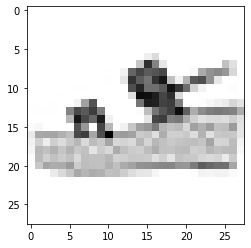


True class: Pullover
Predicted class: Coat
Misclassified 3278 times


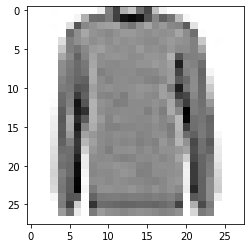


True class: Shirt
Predicted class: Coat
Misclassified 2717 times


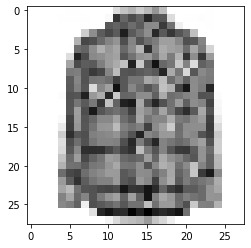


True class: Dress
Predicted class: Trouser
Misclassified 2294 times


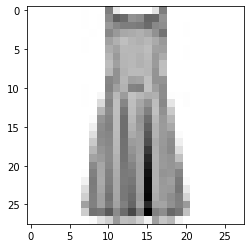


True class: Ankle boot
Predicted class: Sneaker
Misclassified 1798 times


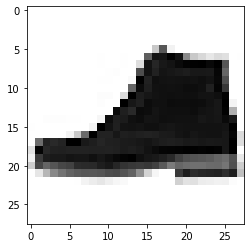

In [463]:
analyze_model(naive_bayes, x_train_prep_1d, y_train, x_train_prep)

NB Cross validation score

In [464]:
print(np.mean(cross_val_score(estimator=naive_bayes, cv=4, scoring='accuracy', X=x_test_prep_1d, y=y_test)))

0.5711


Model performance on Test Data

Confusion matrix:
[[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  14 324  65 545   0  23   0  22   0]
 [  9 387   6 545  43   0   4   0   6   0]
 [  0  34  44 131 779   0   4   0   8   0]
 [  0   0   1   1   0 278   3 660   5  52]
 [117  34 112 200 435   0  40   0  62   0]
 [  0   0   0   0   0   3   0 988   0   9]
 [  0   2  19  85 149   3  27   4 710   1]
 [  0   0   1   1   0  16   3 304   8 667]]

True class: Sandal
Predicted class: Sneaker
Misclassified 660 times


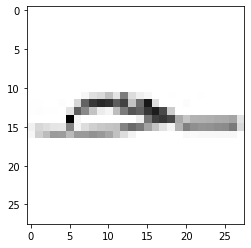


True class: Pullover
Predicted class: Coat
Misclassified 545 times


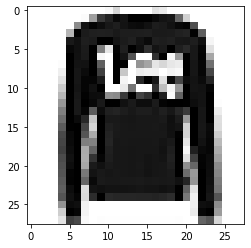


True class: Shirt
Predicted class: Coat
Misclassified 435 times


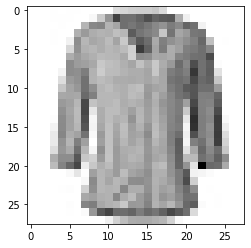


True class: Dress
Predicted class: Trouser
Misclassified 387 times


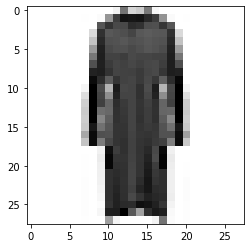


True class: Ankle boot
Predicted class: Sneaker
Misclassified 304 times


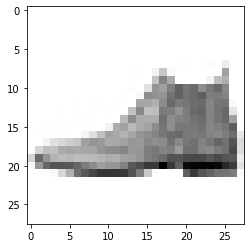

In [465]:
analyze_model(naive_bayes, x_test_prep_1d, y_test, x_test_prep)


Logistic Regression Model

In [466]:
train_samples=5000
lr = LogisticRegression(C=50. / train_samples,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)
lr.fit(x_train_prep_1d, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.1, verbose=0,
                   warm_start=False)

In [467]:
#training accuracy
lr.score(x_train_prep_1d, y_train)

0.8209166666666666

In [468]:
#Training cross validation score
print(np.mean(cross_val_score(estimator=lr, cv=4, scoring='accuracy', X=x_train_prep_1d, y=y_train)))

0.8076166666666666


In [469]:
#Logistic Regression performance on Test Data
lr.score(x_test_prep_1d, y_test)

0.8099

In [470]:
prediction=cross_val_predict(lr, X=x_train_prep_1d, y=y_train, cv=4 )

In [471]:
print(np.mean(cross_val_score(estimator=lr, cv=4, scoring='accuracy', X=x_test_prep_1d, y=y_test)))

0.7131


Logisitc Regression Model Performance for Test Data

Confusion matrix:
[[797   4  13  67   6  17  80   0  15   1]
 [  9 928  14  42   5   1   0   0   1   0]
 [ 25   6 692   8 155   4 100   0  10   0]
 [ 35  10   6 865  24   3  50   0   6   1]
 [  1   0 118  37 738   5  93   0   8   0]
 [  0   0   0   2   0 882   0  67  11  38]
 [171   2 128  47 110  13 496   0  33   0]
 [  0   0   0   0   0  66   0 865   0  69]
 [  0   1  16  18   2  19  23   7 913   1]
 [  0   0   0   0   0  29   0  46   2 923]]

True class: Shirt
Predicted class: T-shirt/top
Misclassified 171 times


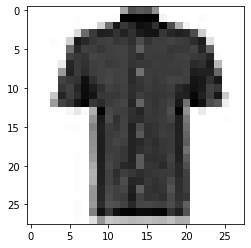


True class: Pullover
Predicted class: Coat
Misclassified 155 times


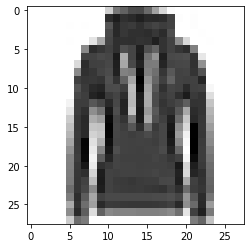


True class: Shirt
Predicted class: Pullover
Misclassified 128 times


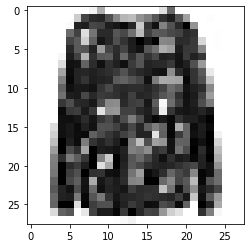


True class: Coat
Predicted class: Pullover
Misclassified 118 times


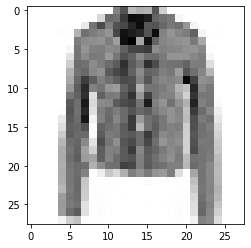


True class: Shirt
Predicted class: Coat
Misclassified 110 times


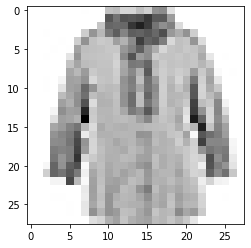

In [472]:
analyze_model(lr, x_test_prep_1d, y_test, x_test_prep)

Random Forest Classifier Model at depth 10

In [473]:
forest1=RandomForestClassifier(max_depth=10)
forest1.fit(x_train_prep_1d, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [474]:
forest1.score(x_train_prep_1d, y_train)

0.8826

Confusion matrix:
[[825   0  17  59   7   1  77   0  14   0]
 [  3 942   8  34   4   0   7   0   2   0]
 [  9   0 730   8 197   0  51   0   5   0]
 [ 23   3  16 897  37   0  21   0   3   0]
 [  1   1 102  46 799   0  48   0   3   0]
 [  0   0   0   1   0 932   0  49   2  16]
 [186   1 151  43 120   0 479   0  20   0]
 [  0   0   0   0   0  11   0 923   0  66]
 [  0   0  12   4   5   2   7   5 964   1]
 [  0   0   0   0   0   7   1  53   2 937]]

True class: Pullover
Predicted class: Coat
Misclassified 197 times


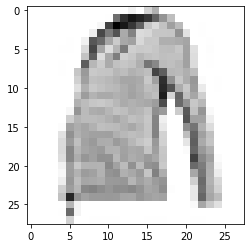


True class: Shirt
Predicted class: T-shirt/top
Misclassified 186 times


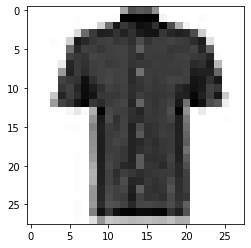


True class: Shirt
Predicted class: Pullover
Misclassified 151 times


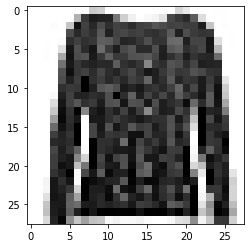


True class: Shirt
Predicted class: Coat
Misclassified 120 times


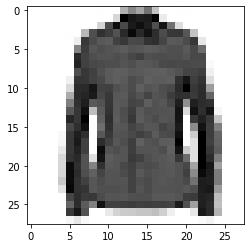


True class: Coat
Predicted class: Pullover
Misclassified 102 times


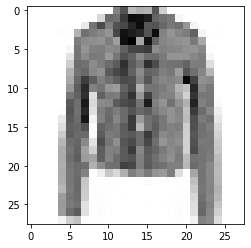

In [475]:
analyze_model(forest1, x_test_prep_1d, y_test, x_test)

In [484]:
forest1.score(x_test_prep_1d, y_test)

0.8428

Random Forest Classifier number 2 with a depth of 40

In [485]:
forest2=RandomForestClassifier(max_depth=40)
forest2.fit(x_train_prep_1d, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [478]:
forest2.score(x_train_prep_1d, y_train)

1.0

In [479]:
forest2.score(x_test_prep_1d, y_test)

0.8776

Confusion matrix:
[[863   0   9  28   5   1  82   0  12   0]
 [  3 961   3  23   3   0   5   0   2   0]
 [ 13   0 807   8 113   0  54   0   5   0]
 [ 19   2   8 905  33   0  31   0   2   0]
 [  1   0  94  35 816   0  51   0   3   0]
 [  0   0   0   1   0 958   0  29   1  11]
 [149   1 118  30  79   0 605   0  18   0]
 [  0   0   0   0   0  16   0 945   0  39]
 [  0   2   5   3   5   1   8   3 972   1]
 [  0   0   0   0   0   7   1  46   2 944]]

True class: Shirt
Predicted class: T-shirt/top
Misclassified 149 times


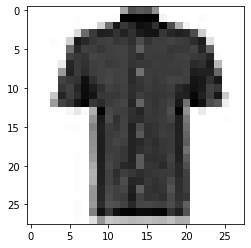


True class: Shirt
Predicted class: Pullover
Misclassified 118 times


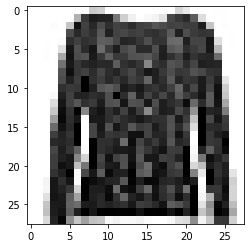


True class: Pullover
Predicted class: Coat
Misclassified 113 times


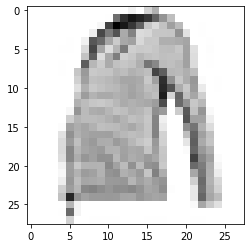


True class: Coat
Predicted class: Pullover
Misclassified 94 times


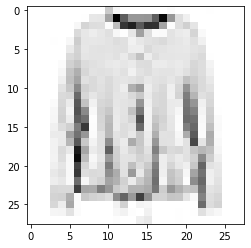


True class: T-shirt/top
Predicted class: Shirt
Misclassified 82 times


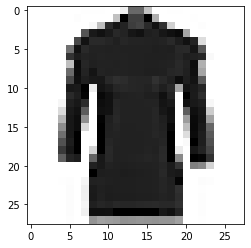

In [480]:
analyze_model(forest2, x_test_prep_1d, y_test, x_test)

Basic Neural Network

In [481]:
nnmodel = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [482]:
nnmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [483]:
rice1=nnmodel.fit(x_train_prep_1d, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6498 - accuracy: 0.7750 - val_loss: 0.4243 - val_accuracy: 0.8508
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3952 - accuracy: 0.8561 - val_loss: 0.3803 - val_accuracy: 0.8633
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3486 - accuracy: 0.8732 - val_loss: 0.3649 - val_accuracy: 0.8678
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3273 - accuracy: 0.8800 - val_loss: 0.3323 - val_accuracy: 0.8802
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2991 - accuracy: 0.8887 - val_loss: 0.3360 - val_accuracy: 0.8805
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2829 - accuracy: 0.8950 - val_loss: 0.3225 - val_accuracy: 0.8854
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2753 - accuracy: 0.8971 - val_loss: 0.3434 - val_accuracy:

In [486]:
test_loss, test_acc=nnmodel.evaluate(x_test_prep_1d, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4285 - accuracy: 0.8853


In [487]:
score=nnmodel.evaluate(x_test_prep_1d, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4285 - accuracy: 0.8853


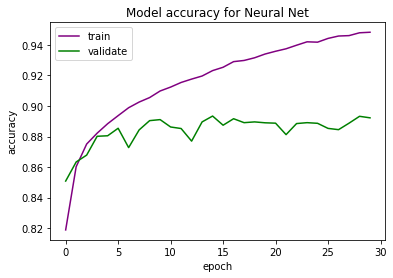

In [488]:
plt.plot(rice1.history['accuracy'], 'purple')
plt.plot(rice1.history['val_accuracy'], 'green')
plt.title('Model accuracy for Neural Net')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

NN1 Performance on actual data.

In [489]:
mypredictions=nnmodel.predict(x_test_prep_1d)

In [490]:
labindex=np.argmax(mypredictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


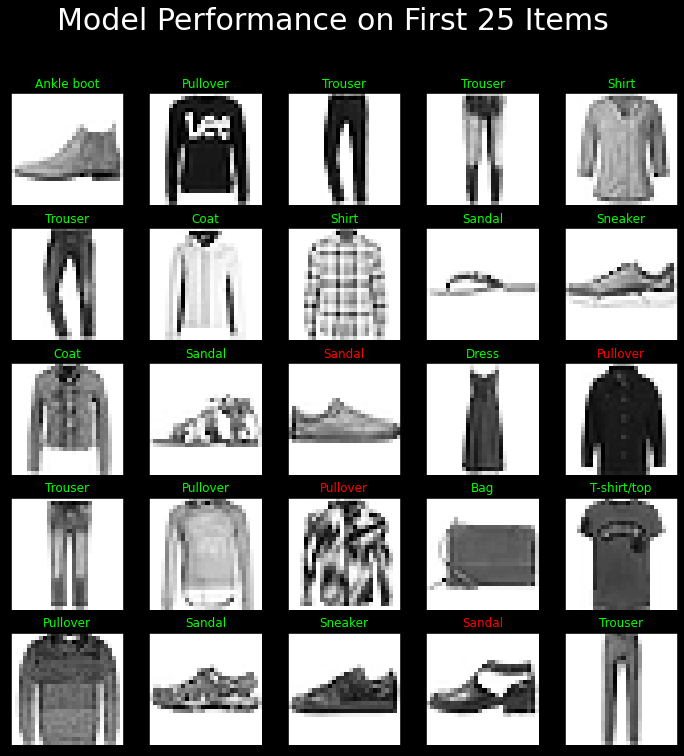

In [491]:
# Making predictions on Test dataset


fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
fig.set_figheight(12)
fig.set_figwidth(12)
ax = ax.flatten()
for i in range(25):
  
  predicted_test_labels_index = np.argmax(mypredictions[i])

  predicted_test_labels_index

  mypredictions[i]


  ax[i].imshow(np.squeeze(x_test_prep[i]), cmap='Greys', interpolation='nearest')
  
  if classes[predicted_test_labels_index]==classes[y_test[i]]:
      ax[i].set_title(classes[predicted_test_labels_index], color='lime')
  else:
      ax[i].set_title(classes[predicted_test_labels_index], color='red') 
ax[0].set_xticks([])
ax[0].set_yticks([])
fig.patch.set_facecolor('black')
fig.suptitle('Model Performance on First 25 Items', fontsize=30, color='white')
plt.tight_layout(pad=20)
plt.show()

Complex Neural Network with various layer additions.

In [492]:
num_classes = 10
input_shape = (28, 28, 1)

In [493]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [494]:
num_pixels = x_train.shape[1] * x_train.shape[2]
X_train = x_train_prep_1d.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = x_test_prep_1d.reshape(X_test.shape[0], num_pixels).astype('float32')

In [495]:
x_train = np.expand_dims(x_train_prep, -1)
x_test = np.expand_dims(x_test_prep, -1)

In [496]:
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [497]:
def complex_model():
    model = keras.Sequential()
    model.add(keras.Input(shape=input_shape))                                   # input layer - in this case the basic 28 x 28
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))         # first convolution layer - creates new feature map - builds up 
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))                            # pooling layer to slim down the number of features
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))                                              # help prevent overfitting  
    model.add(layers.Dense(num_classes, activation="softmax"))
    #COMPILE MODEL
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [ ]:
import time

In [498]:
batch_size = 200
epochs = 5

start = time.time()  # TRACK TIME
model = complex_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# MODEL - RESULTS

score = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-score[1]*100))

end = time.time()
final_time = end-start
print(final_time)  # RUN TIME OF BLOCK

Epoch 1/5
270/270 [==============================] - 2s 7ms/step - loss: 1.1382 - accuracy: 0.6060 - val_loss: 0.4689 - val_accuracy: 0.8298
Epoch 2/5
270/270 [==============================] - 2s 6ms/step - loss: 0.4923 - accuracy: 0.8229 - val_loss: 0.4096 - val_accuracy: 0.8540
Epoch 3/5
270/270 [==============================] - 2s 6ms/step - loss: 0.4269 - accuracy: 0.8497 - val_loss: 0.3719 - val_accuracy: 0.8675
Epoch 4/5
270/270 [==============================] - 2s 6ms/step - loss: 0.4046 - accuracy: 0.8542 - val_loss: 0.3491 - val_accuracy: 0.8767
Epoch 5/5
270/270 [==============================] - 2s 6ms/step - loss: 0.3738 - accuracy: 0.8671 - val_loss: 0.3280 - val_accuracy: 0.8830
Baseline Error: 11.98%
9.342667818069458


Complex model number 2

In [528]:
def complex_model2():
    model = keras.Sequential()
    model.add(keras.Input(shape=input_shape))                                   # input layer - in this case the basic 28 x 28
    model.add(layers.Conv2D(20, kernel_size=(3, 3), activation="relu"))         # first convolution layer - creates new feature map - builds up 
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))                            # pooling layer to slim down the number of features
    model.add(layers.Conv2D(50, kernel_size=(3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(100, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))                                              # help prevent overfitting  
    model.add(layers.Dense(num_classes, activation="softmax"))
    model.add(layers.Dense(10, activation='softmax'))
    #COMPILE MODEL
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [521]:
batch_size = 200
epochs = 5

start = time.time()  # TRACK TIME
model = complex_model2()
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# MODEL - RESULTS

score = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-score[1]*100))

end = time.time()
final_time = end-start
print(final_time)  # RUN TIME OF BLOCK

Epoch 1/5
270/270 [==============================] - 2s 6ms/step - loss: 1.3165 - accuracy: 0.5289 - val_loss: 0.5724 - val_accuracy: 0.7838
Epoch 2/5
270/270 [==============================] - 2s 6ms/step - loss: 0.6480 - accuracy: 0.7641 - val_loss: 0.5033 - val_accuracy: 0.8172
Epoch 3/5
270/270 [==============================] - 2s 6ms/step - loss: 0.5639 - accuracy: 0.7988 - val_loss: 0.4519 - val_accuracy: 0.8340
Epoch 4/5
270/270 [==============================] - 2s 6ms/step - loss: 0.5179 - accuracy: 0.8178 - val_loss: 0.4306 - val_accuracy: 0.8383
Epoch 5/5
270/270 [==============================] - 2s 6ms/step - loss: 0.4819 - accuracy: 0.8300 - val_loss: 0.4196 - val_accuracy: 0.8440
Baseline Error: 16.02%
9.68072509765625


In [531]:
batch_size = 2000
epochs = 50

model = complex_model2()
history=model.fit(x_train, y_train, epochs=epochs, validation_split=0.2)

# MODEL - RESULTS

score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 1.9232 - accuracy: 0.2921 - val_loss: 1.4391 - val_accuracy: 0.4017
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 1.3686 - accuracy: 0.4154 - val_loss: 1.2140 - val_accuracy: 0.4658
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 1.1986 - accuracy: 0.4792 - val_loss: 1.1107 - val_accuracy: 0.5218
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 1.1045 - accuracy: 0.5306 - val_loss: 1.0193 - val_accuracy: 0.5878
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.9780 - accuracy: 0.6412 - val_loss: 0.8381 - val_accuracy: 0.6731
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8197 - accuracy: 0.6906 - val_loss: 0.7630 - val_accuracy: 0.7235
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7674 - accuracy: 0.7078 - val_loss: 0.7259 - val_accuracy:

Plot performance of complex neural network model and peformance on the first 30 items in the Test Data

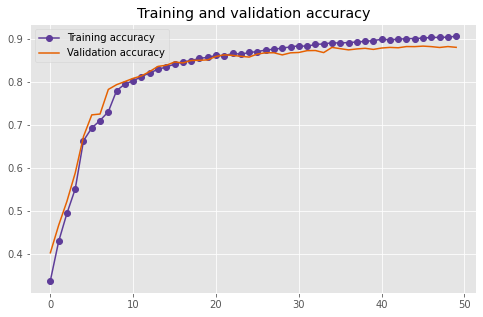

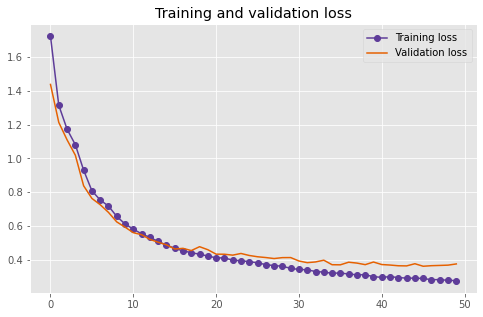

In [532]:
def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)

In [533]:
mypredictions=model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


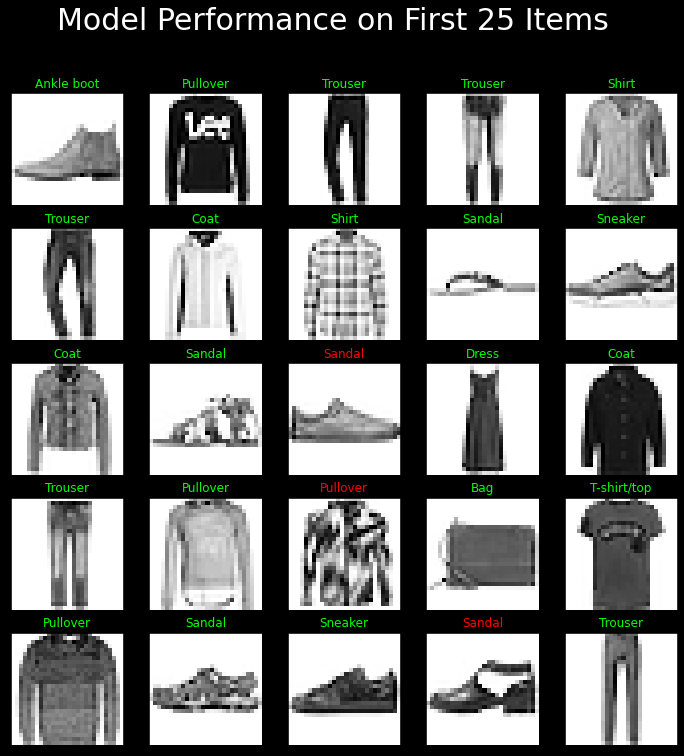

In [536]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
fig.set_figheight(12)
fig.set_figwidth(12)
ax = ax.flatten()

for i in range(25):
  predicted_test_labels_index = np.argmax(mypredictions[i])

  predicted_test_labels_index
  ylabelindex=np.argmax(y_test[i])

  #mypredictions[i]
  #plt.figure()
  ax[i].imshow(np.squeeze(x_test_prep[i]), cmap='Greys', interpolation='nearest')
  
  
  if classes[predicted_test_labels_index]==classes[ylabelindex]:
      ax[i].set_title(classes[predicted_test_labels_index], color='lime')
  else:
      ax[i].set_title(classes[predicted_test_labels_index], color='red') 
  #ax[i].set_title(classes[predicted_test_labels_index])
ax[0].set_xticks([])
ax[0].set_yticks([])
fig.patch.set_facecolor('black')
fig.suptitle('Model Performance on First 25 Items', fontsize=30, color='white')
plt.tight_layout(pad=20)
plt.show()